# Student Performance prediction model

## Problem statement 

In [ ]:
predict student exam scores from daily habits.

## 1.Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

import warnings
warnings.filterwarnings("ignore")

## 2.Load Dataset

In [10]:
df=pd.read_csv(r"C:\Users\Ashwini\Downloads\student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


## 3.EDA -Exploratory Data Analysis

In [11]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [12]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [13]:
df.sample(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
758,1758,17,Male,3.2,2.6,2.8,No,100.0,7.1,Fair,1,High School,Good,10,Yes,75.4
774,1774,18,Female,7.5,3.6,1.9,Yes,85.9,7.8,Fair,6,Bachelor,Average,3,No,100.0
250,1250,22,Male,5.5,3.5,1.1,Yes,81.3,7.0,Good,2,High School,Average,10,No,100.0
289,1289,24,Female,3.5,1.7,1.3,No,74.3,6.1,Good,1,High School,Good,7,Yes,73.5
591,1591,24,Female,4.5,4.4,2.2,No,85.1,6.5,Fair,4,High School,Good,1,No,64.0
730,1730,19,Female,4.3,2.7,2.6,Yes,91.9,5.0,Good,3,Bachelor,Good,1,No,58.4
742,1742,18,Female,5.3,1.8,3.6,No,88.6,5.7,Fair,4,Bachelor,Average,1,Yes,71.0
77,1077,20,Female,2.7,1.4,0.4,No,82.6,7.8,Fair,1,Bachelor,Poor,1,No,57.2
800,1800,17,Male,3.4,1.5,1.0,No,90.8,7.5,Good,4,Bachelor,Poor,7,Yes,86.1
283,1283,23,Male,1.6,3.3,3.5,Yes,73.0,8.1,Good,6,High School,Good,1,No,47.1


In [14]:
df.describe()  

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.000000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,288.819436,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,1000.000000,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,1249.750000,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,1499.500000,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,1749.250000,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,1999.000000,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [15]:
df.shape

(1000, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [17]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [18]:
df["parental_education_level"].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [19]:
df["parental_education_level"].mode()

0    High School
Name: parental_education_level, dtype: object

In [20]:
df["parental_education_level"].fillna(df["parental_education_level"].mode()[0],inplace=True)

In [21]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [22]:
df.drop(columns="student_id", inplace=True)  #unnessary column is drop


####  Splitting Dataset into Features (X) and Target (y)

In [23]:
X=df.drop(columns="exam_score")   
y=df["exam_score"] #target column

In [24]:
X

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No


#### check numric column and categorical column

In [25]:
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns
numeric_cols 

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating'],
      dtype='object')

In [26]:
numeric_cols=[ 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating']


In [27]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols


Index(['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
       'internet_quality', 'extracurricular_participation'],
      dtype='object')

In [28]:
categorical_cols=['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']

## Categorical column

In [29]:
for col in categorical_cols:
    print(f"value counts for {col}:\n {df[col].value_counts()}")

value counts for gender:
 gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
value counts for part_time_job:
 part_time_job
No     785
Yes    215
Name: count, dtype: int64
value counts for diet_quality:
 diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
value counts for parental_education_level:
 parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64
value counts for internet_quality:
 internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
value counts for extracurricular_participation:
 extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


#### label encoding 

In [30]:
le = LabelEncoder()
for col in categorical_cols:
   X[col] = le.fit_transform(X[col])


In [31]:
X

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0


In [32]:
#df[numeric_cols].skew()

## Numrical column

In [33]:
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns
numeric_cols 

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation'],
      dtype='object')

In [34]:
numeric_cols=[ 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating']

## 4.Sknewness

Sknewness age  0.0084371397444062


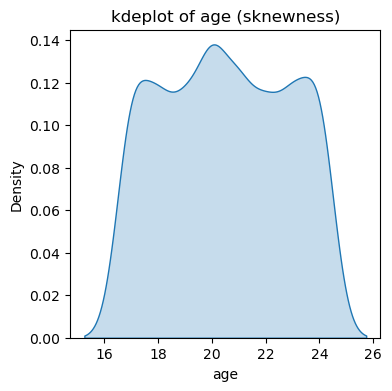

Sknewness study_hours_per_day  0.05425310140811603


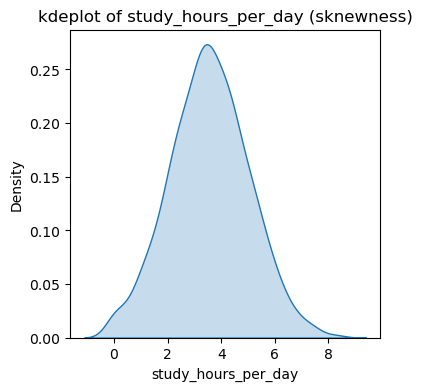

Sknewness social_media_hours  0.11980520318308562


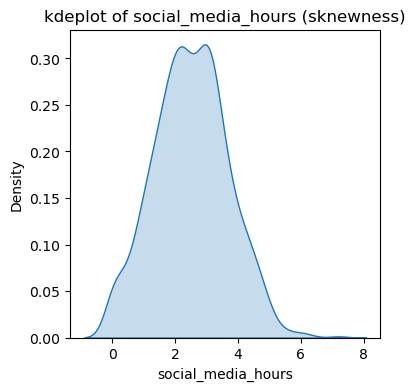

Sknewness netflix_hours  0.23715439564540441


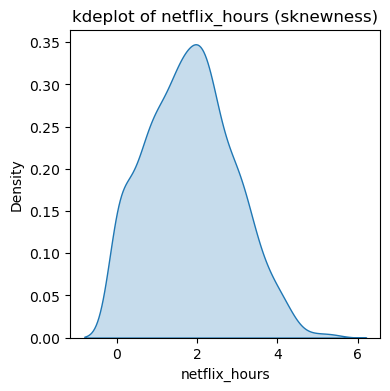

Sknewness attendance_percentage  -0.23781042684597256


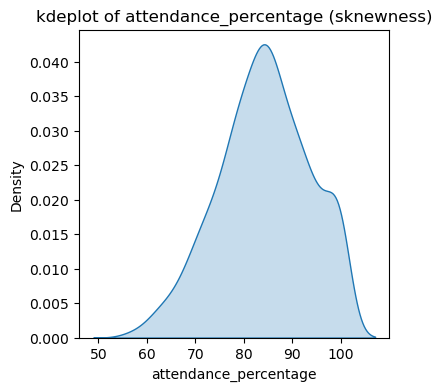

Sknewness sleep_hours  0.09148397227093791


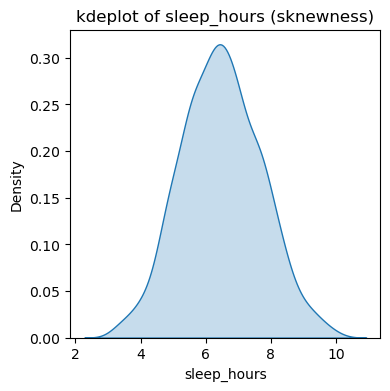

Sknewness exercise_frequency  -0.03192297249384373


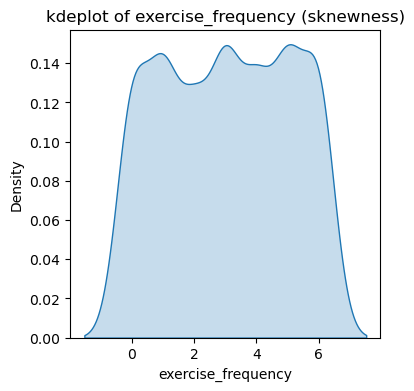

Sknewness mental_health_rating  0.037810699888038285


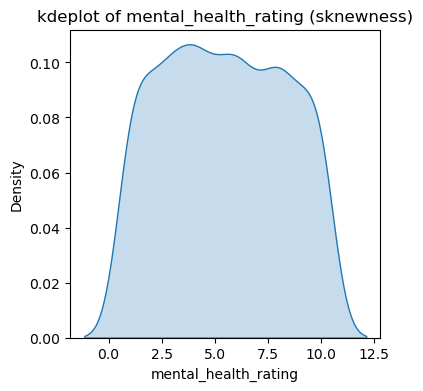

In [35]:
for col in numeric_cols:
    plt.figure(figsize=(4,4))
   
    sns.kdeplot(x=df[col],fill=True)
    print(f"Sknewness {col}  {df[col].skew()}")  #sknewness of numeric columns
    plt.title(f"kdeplot of {col} (sknewness)")
    plt.show()

In [36]:
#sns.histplot(df["netflix_hours"],kde=True)

## 5.Outliers

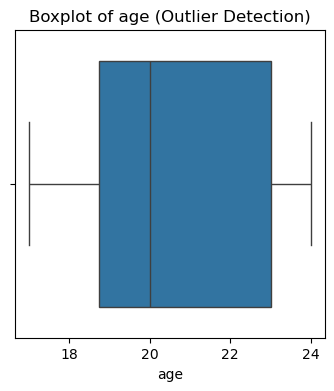

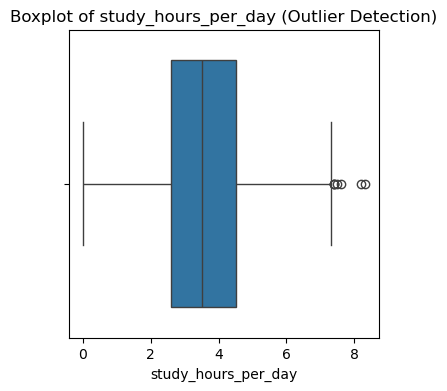

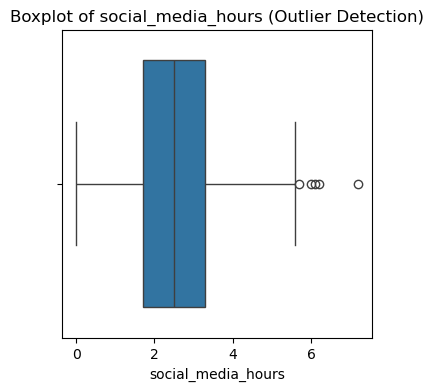

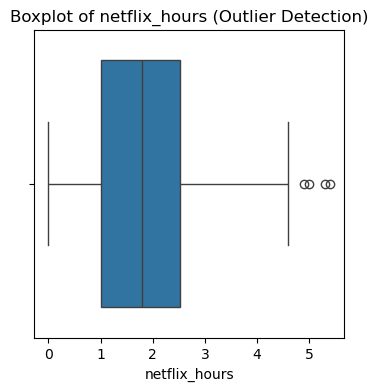

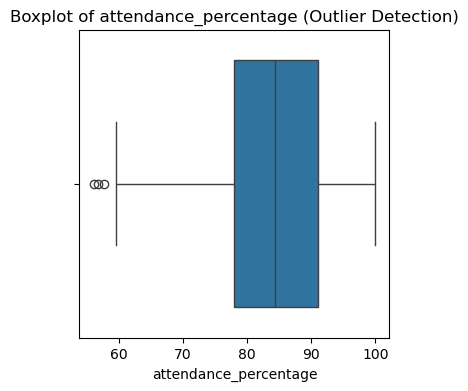

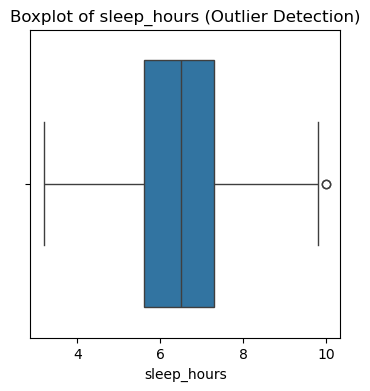

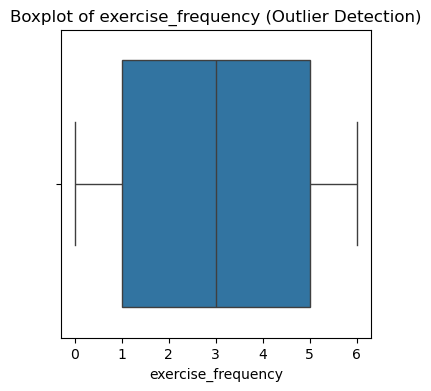

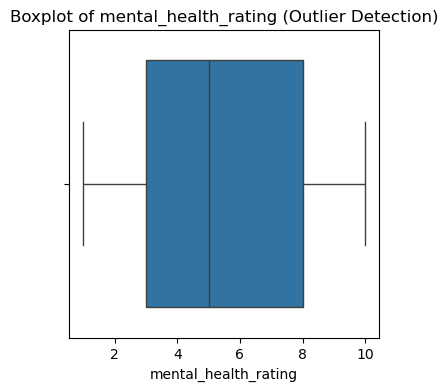

In [37]:

# create boxplot for each numeric column (outlier Detection)
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

## 6.Handle outliers

In [38]:
#handle outliers with iqr method

columns = ["study_hours_per_day", "social_media_hours",
           "netflix_hours", "sleep_hours"]
for col in columns:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)

    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    # Capping upper and lower outliers
    X.loc[X[col] > ub, col] = ub   


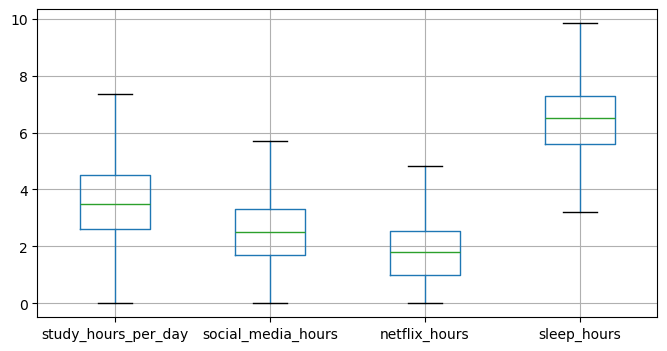

In [39]:
X.boxplot(columns,figsize=(8,4))
plt.show()

In [40]:
#recheck skewness
X[numeric_cols].skew()

age                      0.008437
study_hours_per_day      0.020412
social_media_hours       0.057803
netflix_hours            0.209187
attendance_percentage   -0.237810
sleep_hours              0.086555
exercise_frequency      -0.031923
mental_health_rating     0.037811
dtype: float64

## 7.correlation

In [41]:
df1=df.select_dtypes(include="number")

In [42]:
df1.corr().tail(1)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.0


#### heatmap

<Axes: >

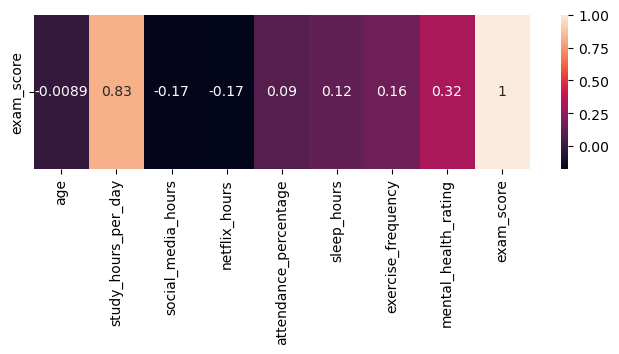

In [43]:
plt.figure(figsize=(8,2))
sns.heatmap(df1.corr().tail(1),annot=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# 8.Algorithm

### 1.RandomForestRegressor

In [46]:
model = RandomForestRegressor(n_estimators=300,random_state=42, n_jobs=-1)
#model.fit(X_train, y_train)
model.fit(preprocess.fit_transform(X_train), y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

### traning

In [47]:
# Predict on training data
y_train_pred = model.predict(preprocess.transform(X_train))
rf_mse=mean_squared_error(y_train, y_train_pred)
rf_rmse=np.sqrt(rf_mse)
rf_train_r2 = r2_score(y_train, y_train_pred)

print("RandomForestRegressor")
print("MSE",rf_mse)
print("RMSE:", rf_rmse)
print("Training R² Score:", rf_train_r2)
print()

RandomForestRegressor
MSE 5.728109639861051
RMSE: 2.393346953506961
Training R² Score: 0.9803704530497911



### testing

In [48]:
#testing
y_test_pred = model.predict(preprocess.transform(X_test))
rf_mse=mean_squared_error(y_test, y_test_pred)
rf_rmse=np.sqrt(rf_mse)
rf_test_r2 = r2_score(y_test, y_test_pred)

print("RandomForestRegressor")
print("MSE",rf_mse)
print("RMSE:", rf_rmse)
print("Testing R² Score:", rf_test_r2)
print()

RandomForestRegressor
MSE 38.21204858999993
RMSE: 6.1815894873406085
Testing R² Score: 0.8509839593631764



In [49]:
rf = RandomForestRegressor(random_state=42)
params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 15],
    "max_features": ["sqrt", 0.5],
    "bootstrap": [True]}
grid = GridSearchCV( rf, params, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid.fit(preprocess.fit_transform(X_train), y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [50]:
y_train_pred = best_model.predict(preprocess.transform(X_train))
train_r2 = r2_score(y_train, y_train_pred)
print("RandomForestRegressor (After Strong Tuning)")
print("Training R² Score:", train_r2)
print()

RandomForestRegressor (After Strong Tuning)
Training R² Score: 0.9255812509976982



In [51]:
# Predict on test data
y_test_pred = best_model.predict(preprocess.transform(X_test))
rf_test_r2 = r2_score(y_test, y_test_pred)
print("RandomForestRegressor (After GridSearch)")
print("Testing R² Score:", rf_test_r2)


RandomForestRegressor (After GridSearch)
Testing R² Score: 0.8473456858104194


### 2. LinearRegression

In [52]:
model = LinearRegression()
model.fit(preprocess.fit_transform(X_train), y_train)

LinearRegression()

In [53]:
#traning

In [54]:
# Predict on training data
y_train_pred = model.predict(preprocess.transform(X_train))
lr_mse=mean_squared_error(y_train, y_train_pred)
lr_rmse=np.sqrt(lr_mse)
lr_train_r2 = r2_score(y_train, y_train_pred)

print("LinearRegression")
print("MSE",lr_mse)
print("RMSE:", lr_rmse)
print("Training R² Score:", lr_train_r2)
print()

LinearRegression
MSE 27.944855888438088
RMSE: 5.286289425337785
Training R² Score: 0.9042363196294854



In [55]:
#testing
y_test_pred = model.predict(preprocess.transform(X_test))
lr_mse=mean_squared_error(y_test, y_test_pred)
lr_rmse=np.sqrt(lr_mse)
lr_test_r2 = r2_score(y_test, y_test_pred)

print("LinearRegression")
print("MSE",lr_mse)
print("RMSE:", lr_rmse)
print("Testing R² Score:", lr_test_r2)
print()

LinearRegression
MSE 26.297393893328145
RMSE: 5.128098467592851
Testing R² Score: 0.8974476987848207



In [57]:
print("==========================================")
print("MODEL PERFORMANCE COMPARISON")
print("==========================================")
print(f"Random Forest:                         Training R² Score = {rf_train_r2:.4f} |Testing R² Score: {rf_test_r2:.4f}") #overfiting
#print(f"Random Forest:(After tunning)          Training R² Score = {train_r2:.4f} |Testing R² Score: {test_r2:.4f}")#reduce overfit but same testscore
print(f"Linear Regression:                     Training R² Score= {lr_train_r2:.4f}  |Testing R² Score: {lr_test_r2:.4f}") #best model

MODEL PERFORMANCE COMPARISON
Random Forest:                         Training R² Score = 0.9804 |Testing R² Score: 0.8473
Linear Regression:                     Training R² Score= 0.9042  |Testing R² Score: 0.8974


In [ ]:
# Save the best model (linear is best in most cases)
best_model = Pipeline([("preprocess", preprocess),
                    ("model", LinearRegression())])

In [ ]:

best_model.fit(X, y)
joblib.dump(best_model, "student_performace__exam_score_model.pkl")
print("Model saved as student_performace__exam_score_model.pkl")